# Practice Notebook

Dear participants,

Welcome to your practice notebook! This is your opportunity to reinforce the basic python steps that you learned during the first part of this course. Next week, we will spend more time practicing the implementation of larger models that can be applied to health care problems.

While solutions are provided, I encourage you to challenge yourself: try to solve each task on your own before peeking! Use this notebook to experiment, explore, and build confidence in using Python, Pandas, plotting, and SCIP.

Happy coding!

## Task 1: Basic Python Practice

Let's begin with some simple Python exercises to warm up.

### ✏️ Subtask 1: Celsius to Fahrenheit
Write a function that takes a temperature in Celsius and returns the temperature in Fahrenheit.

**Formula:**
$$ \text{Fahrenheit} = \text{Celsius} \times \frac{9}{5} + 32 $$

Name your function **celsius_to_fahrenheit**.

In [1]:
# Code Cell (Subtask 1: Celsius to Fahrenheit)

# Remember, you need to define a function and add a return statement!
def celsius_to_fahrenheit(c):
    return c * 9 / 5 + 32

# Test your function with the code below
print("25°C in Fahrenheit:", celsius_to_fahrenheit(25))
# If everything is implemented correctly, the result should be 77.0 Fahrenheit.

25°C in Fahrenheit: 77.0


### ✏️ Subtask 2: Looping Through Numbers
Create a list of numbers from 1 to 1000 and print only the numbers that have an integer root. Use the function **sqrt** from the package **math** to compute the square roots.

In [8]:
# ✅ Code Cell (Subtask 2: Print Even Numbers from 1 to 20)
import math 

numbers = list(range(1, 1000))
print("Numbers with an integer root between 1 and 1000:")
for number in numbers:
    if math.sqrt(number) % 2 == 0:
        print(number)


Numbers with an integer root between 1 and 1000:
4
16
36
64
100
144
196
256
324
400
484
576
676
784
900


## Task 2: Dictionaries and DataFrames
Let's practice converting a dictionary into a Pandas DataFrame.

Below is the country data we will use:

| Country      | Population (M) | GDP (Billion USD) |
|--------------|----------------|--------------------|
| Germany      | 83             | 4200               |
| Nepal        | 30             | 40                 |
| Japan        | 126            | 5000               |
| Brazil       | 212            | 1800               |
| Canada       | 38             | 2000               |

### ✏️ Task:
1. Create a **nested dictionary** named `country_data` where each **country name** is a key, and the value is another dictionary with `Population` and `GDP`.
2. Convert this dictionary into a Pandas DataFrame.
3. Display the resulting DataFrame.

This will help us prepare for plotting and analyzing data in the next task.

In [11]:
import pandas as pd

# A nested dictionary: each country maps to another dictionary of indicators
country_data = {
    "Germany": {"Population": 83, "GDP": 4200},
    "Nepal": {"Population": 30, "GDP": 40},
    "Japan": {"Population": 126, "GDP": 5000},
    "Brazil": {"Population": 212, "GDP": 1800},
    "Canada": {"Population": 38, "GDP": 2000},
}

# Convert to DataFrame
df = pd.DataFrame.from_dict(country_data, orient="index")
print("Country DataFrame:")
print(df)


Country DataFrame:
         Population   GDP
Germany          83  4200
Nepal            30    40
Japan           126  5000
Brazil          212  1800
Canada           38  2000


## Task 3: DataFrame Analysis and Plotting

Now that we have a DataFrame, let's compute some new information and visualize it.

### ✏️ Task:
1. Add a new column called `GDP_per_capita` to the DataFrame (in thousand USD).
   - 💡 Formula: `GDP / Population * 1000`
2. Sort the DataFrame by `GDP_per_capita` in descending order.
3. Plot a **bar chart** of GDP per capita for all countries.

Use **matplotlib** or **seaborn** to create the chart.

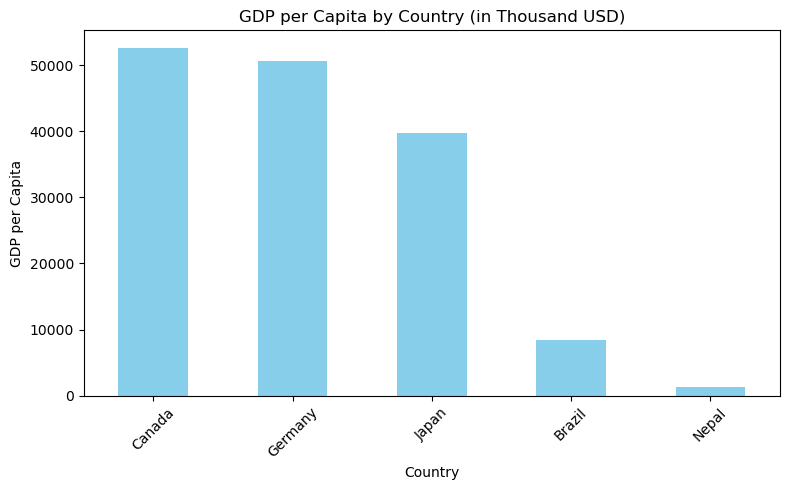

In [14]:
# ✅ Code Cell (Analyze and Plot GDP per Capita)
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Calculate GDP per capita (in thousand USD) and add as a new column
df["GDP_per_capita"] = df["GDP"] / df["Population"] * 1000

# Sort DataFrame by GDP per capita in descending order
df_sorted = df.sort_values(by="GDP_per_capita", ascending=False)

# Create a bar plot for GDP per capita
df_sorted["GDP_per_capita"].plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("GDP per Capita by Country (in Thousand USD)")  # Set plot title
plt.ylabel("GDP per Capita")  # Set y-axis label
plt.xlabel("Country")          # Set x-axis label
plt.xticks(rotation=45)       # Rotate x-axis labels for better readability
plt.tight_layout()            # Adjust layout to prevent overlap
plt.show()                    # Display the plot



## Task 4: Implementing and Solving a SCIP Model

In this task, you'll write and solve a small linear optimization problem using SCIP.

### ✏️ Problem:
You run a small production facility that can produce two products: **Product 1** and **Product 2**.
- Each unit of Product 1 gives a profit of 3.
- Each unit of Product 2 gives a profit of 5.
- Producing one unit of Product 1 requires 1 hour, and Product 2 requires 2 hours.
- You have 8 hours available in total.

### 🔍 Goal:
Maximize the total profit under the time constraint.

### 🧮 Mathematical Model:

\begin{align*}
\text{Maximize} \quad & 3x_1 + 5x_2 \\
\text{subject to} \quad & x_1 + 2x_2 \leq 8 \\
& x_1 \geq 0, \quad x_2 \geq 0
\end{align*}


Where:
- \( x_1 \): number of units of **Product 1**
- \( x_2 \): number of units of **Product 2**

### ❗ Reminder:
- Both variables must be non-negative.
- You can use real numbers (no integer restriction).

### 🛠️ Steps:
1. Import the Model class from PySCIPOpt.
2. Create a new SCIP model.
3. Define decision variables.
4. Add the constraint: $$ 1 \cdot x_1 + 2 \cdot x_2 \leq 8 $$
5. Add the objective: $$ 3 \cdot x_1 + 5 \cdot x_2 \to \text{max} $$
6. Solve and print the optimal production plan.

In [1]:
# ✅ Code Cell (SCIP Linear Model with Line-by-Line Explanation)
from pyscipopt import Model  # Import the Model class from PySCIPOpt, which defines the optimization model

model = Model("Production Planning")  # Create a new SCIP model instance using Model()

# Define decision variables (continuous and non-negative) using addVar()
x1 = model.addVar(name="x1", vtype="C")  # Add variable x1 for Product 1 with type "C" (continuous)
x2 = model.addVar(name="x2", vtype="C")  # Add variable x2 for Product 2 with type "C" (continuous)

# Add the constraint using addCons(): total time for both products must be <= 8 hours
model.addCons(x1 * 1 + x2 * 2 <= 8)  # Add linear constraint 1*x1 + 2*x2 ≤ 8

# Set the objective function using setObjective(): maximize total profit
model.setObjective(3 * x1 + 5 * x2, sense="maximize")  # Set objective to maximize 3*x1 + 5*x2

# Solve the optimization model using optimize()
model.optimize()  # Call optimize() to solve the problem

# Retrieve and print results using getVal() and getObjVal()
print("Optimal Production Plan:")
print("Product 1 (x1) =", model.getVal(x1))  # getVal() returns the optimal value of variable x1
print("Product 2 (x2) =", model.getVal(x2))  # getVal() returns the optimal value of variable x2
print("Maximum Profit =", model.getObjVal())  # getObjVal() returns the optimal objective value

Optimal Production Plan:
Product 1 (x1) = 8.0
Product 2 (x2) = 0.0
Maximum Profit = 24.0
